# Module 1 - Manipulating data with Pandas
## Pandas Part 2

![austin](http://www.austintexas.gov/sites/default/files/aac_logo.jpg)

## Scenario:
You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail and get more information about planning. In this lecture, we are continue to look at a real data set collected by Austin Animal Center over several years and use our pandas skills from the last lecture and learn some new ones in order to explore this data further.

#### _Our goals today are to be able to_: <br/>

Use the pandas library to:

- Get summary info about a dataset and its variables
  - Apply and use info, describe and dtypes
  - Use mean, min, max, and value_counts 
- Use apply and applymap to transform columns and create new values

- Explain lambda functions and use them to use an apply on a DataFrame
- Explain what a groupby object is and split a DataFrame using a groupby
- Reshape a DataFrame using joins, merges, pivoting, stacking, and melting


## Getting started

Let's take a moment to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). What kinds of questions can we ask this data and what kinds of information can we get back?

In pairs and as a class, let's generate ideas.

## Switch gears

Before we answer those questions about the animal shelter data, let's practice on a simpler dataset.
Read about this dataset here: https://www.kaggle.com/ronitf/heart-disease-uci
![heart-data](images/heartbloodpres.jpeg)

The dataset is most often used to practice classification algorithms. Can one develop a model to predict the likelihood of heart disease based on other measurable characteristics? We will return to that specific question in a few weeks, but for now we wish to use the dataset to practice some pandas methods.

### 1. Get summary info about a dataset and its variables

Applying and using `info`, `describe`, `mean`, `min`, `max`, `apply`, and `applymap` from the Pandas library

The Pandas library has several useful tools built in. Let's explore some of them.

In [1]:
!pwd
!ls -al /data

/Users/stuartmurphy/Documents/Flatiron_Data_Science_Fellowship/code/dc-ds-111819/module-1/day-6-pandas-3
ls: /data: No such file or directory


In [2]:
import pandas as pd
uci = pd.read_csv('data/heart.csv')

In [3]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### The `.columns` and `.shape` Attributes

In [4]:
uci.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
uci.shape

(303, 14)

#### The `.info() `and `.describe()` and `.dtypes` methods

Pandas DataFrames have many useful methods! Let's look at `.info()` , `.describe()`, and `dtypes`.

In [6]:
# Call the .info() method on our dataset. What do you observe?

uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
# Call the .describe() method on our dataset. What do you observe?

uci.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Use the code below. How does the output differ from info() ?
uci.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### `.mean()`, .`min()`,` .max()`, `.sum()`

The methods `.mean()`, `.min()`, and `.max()` will perform just the way you think they will!

Note that these are methods both for Series and for DataFrames.

In [9]:
uci.ca.mean()

0.7293729372937293

#### The Axis Variable

In [10]:
uci.sum() # Try [shift] + [tab] here!

age         16473.0
sex           207.0
cp            293.0
trestbps    39882.0
chol        74618.0
fbs            45.0
restecg       160.0
thalach     45343.0
exang          99.0
oldpeak       315.0
slope         424.0
ca            221.0
thal          701.0
target        165.0
dtype: float64

#### .`value_counts()`

For a DataFrame _Series_, the `.value_counts()` method will tell you how many of each value you've got.

In [11]:
uci['age'].value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

In [13]:
uci.columns = [x.upper() for x in uci.columns] #This allows you to manipulate the names of all the columns in your df.

In [14]:
uci.columns = ['uci_' + x.lower().replace(' ', '__') for x in uci.columns] #This allows you to manipulate the names of all the columns in your df. LIST COMPREHENSION

Exercise: What are the different values for restecg?

In [21]:
# Your code here!
restecg_val = uci.uci_restecg.unique()
restecg_val2 = uci.uci_restecg.value_counts()

### Apply to Animal Shelter Data
Using `.info()` and `.describe()` and `dtypes` what observations can we make about the data?

What are the breed value counts?

How about age counts for dogs?

In [69]:
animal_outcomes = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')

In [70]:
animal_outcomes.info()
animal_outcomes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111784 entries, 0 to 111783
Data columns (total 12 columns):
Animal ID           111784 non-null object
Name                76532 non-null object
DateTime            111784 non-null object
MonthYear           111784 non-null object
Date of Birth       111784 non-null object
Outcome Type        111776 non-null object
Outcome Subtype     50901 non-null object
Animal Type         111784 non-null object
Sex upon Outcome    111780 non-null object
Age upon Outcome    111747 non-null object
Breed               111784 non-null object
Color               111784 non-null object
dtypes: object(12)
memory usage: 10.2+ MB


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,111784,76532,111784,111784,111784,111776,50901,111784,111780,111747,111784,111784
unique,100147,18201,91909,91909,6656,9,22,5,5,50,2505,580
top,A721033,Max,04/18/2016 12:00:00 AM,04/18/2016 12:00:00 AM,09/01/2015,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,498,39,39,118,48781,28036,63239,39118,20167,30469,11701


In [71]:
import missingno

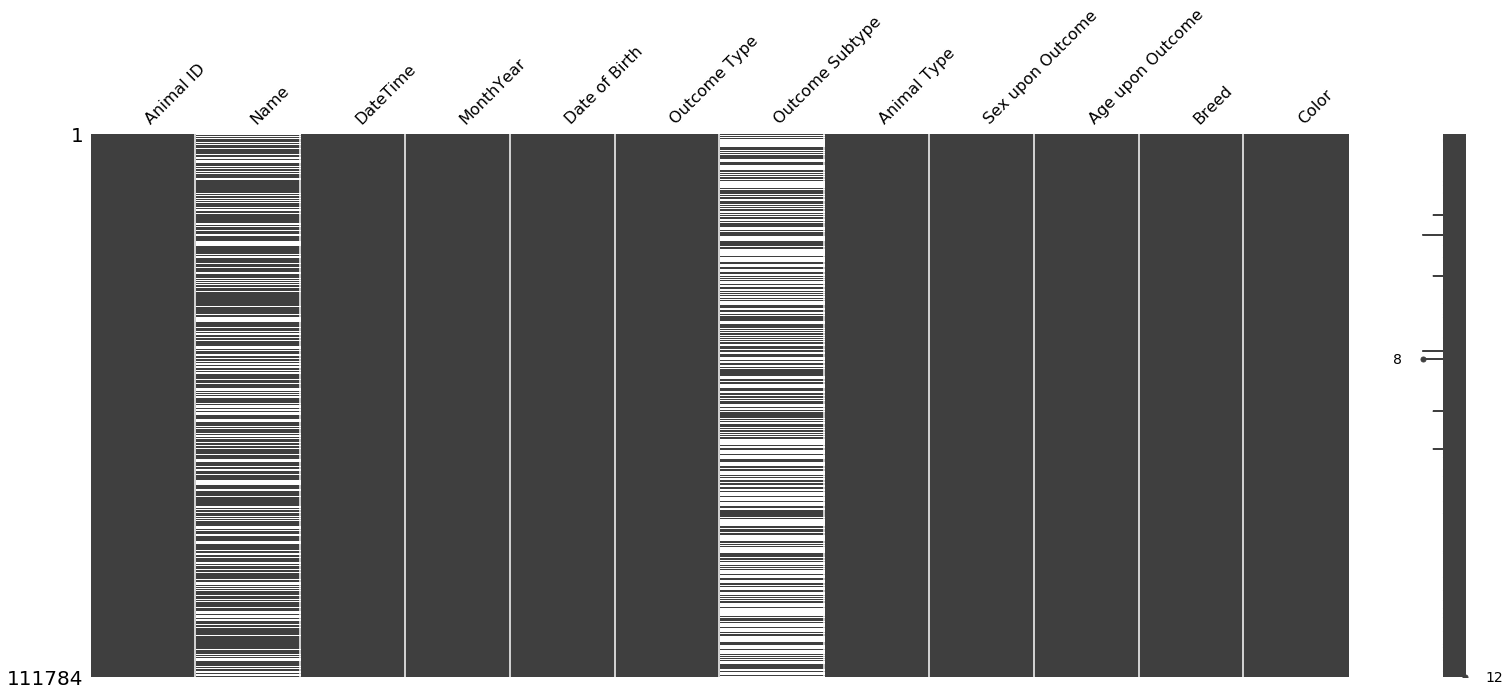

In [72]:
missingno.matrix(animal_outcomes)

What are the breed `value_counts`?
What's the top breed for adopted dogs?

How about outcome counts for dogs?




In [27]:
animal_outcomes.Breed.value_counts()

Domestic Shorthair Mix                          30466
Pit Bull Mix                                     8136
Labrador Retriever Mix                           6419
Chihuahua Shorthair Mix                          6064
Domestic Shorthair                               3975
Domestic Medium Hair Mix                         3056
German Shepherd Mix                              2796
Bat Mix                                          1746
Domestic Longhair Mix                            1507
Australian Cattle Dog Mix                        1413
Siamese Mix                                      1237
Bat                                              1097
Dachshund Mix                                     998
Boxer Mix                                         908
Border Collie Mix                                 892
Miniature Poodle Mix                              836
Pit Bull                                          667
Catahoula Mix                                     636
Labrador Retriever          

In [56]:
animal_outcomes.loc[animal_outcomes['Animal Type'] == 'Dog'].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [51]:
animal_outcomes.loc[(animal_outcomes['Animal Type'] == 'Dog') &
                    (animal_outcomes['Outcome Type'] == 'Adoption')].Breed.value_counts()

Labrador Retriever Mix                            3268
Pit Bull Mix                                      3160
Chihuahua Shorthair Mix                           2905
German Shepherd Mix                               1413
Australian Cattle Dog Mix                          797
Dachshund Mix                                      495
Border Collie Mix                                  483
Boxer Mix                                          426
Catahoula Mix                                      343
Staffordshire Mix                                  340
Miniature Poodle Mix                               329
Australian Shepherd Mix                            307
Pointer Mix                                        282
Siberian Husky Mix                                 280
Cairn Terrier Mix                                  275
Jack Russell Terrier Mix                           275
Chihuahua Shorthair                                272
Labrador Retriever                                 271
Rat Terrie

### 2.  Changing data

#### DataFrame.applymap() and Series.map()

The ```.applymap()``` method takes a function as input that it will then apply to every entry in the dataframe.

In [57]:
def successor(x):
    return x + 1

In [58]:
uci.applymap(successor).head()

,uci_age,uci_sex,uci_cp,uci_trestbps,uci_chol,uci_fbs,uci_restecg,uci_thalach,uci_exang,uci_oldpeak,uci_slope,uci_ca,uci_thal,uci_target
0,64,2,4,146,234,2,1,151,1,3.3,1,1,2,2
1,38,2,3,131,251,1,2,188,1,4.5,1,1,3,2
2,42,1,2,131,205,1,1,173,1,2.4,3,1,3,2
3,57,2,2,121,237,1,2,179,1,1.8,3,1,3,2
4,58,1,1,121,355,1,2,164,2,1.6,3,1,3,2


The `.map()` method takes a function as input that it will then apply to every entry in the Series.

In [61]:
uci['uci_age'].map(successor).tail(10)

293    68
294    45
295    64
296    64
297    60
298    58
299    46
300    69
301    58
302    58
Name: uci_age, dtype: int64

#### Anonymous Functions (Lambda Abstraction)

Simple functions can be defined right in the function call. This is called 'lambda abstraction'; the function thus defined has no name and hence is "anonymous".

In [62]:
uci['uci_oldpeak'].map(lambda x: round(x))[:4]

0    2
1    4
2    1
3    1
Name: uci_oldpeak, dtype: int64

Exercise: Use an anonymous function to turn the entries in age to strings

In [63]:
uci['uci_oldpeak'].apply(lambda x: str(x))[:10]
uci['uci_oldpeak'].apply(str)[:10]
uci['uci_oldpeak'].astype(str)[:10]

0    2.3
1    3.5
2    1.4
3    0.8
4    0.6
5    0.4
6    1.3
7    0.0
8    0.5
9    1.6
Name: uci_oldpeak, dtype: object

### Apply to Animal Shelter Data

Use an `apply` to change the dates from strings to datetime objects. Similarly, use an apply to change the ages of the animals from strings to floats.

In [65]:
animal_outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
1,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
2,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
3,A680969,*Zeus,08/05/2014 04:59:00 PM,08/05/2014 04:59:00 PM,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby
4,A684617,NaN,07/27/2014 09:00:00 AM,07/27/2014 09:00:00 AM,07/26/2012,Transfer,SCRP,Cat,Intact Female,2 years,Domestic Shorthair Mix,Black


In [66]:
animal_outcomes.DateTime.apply(lambda x:)

NameError: name 'datetime' is not defined

## 3. Methods for Re-Organizing DataFrames
#### `.groupby()`

Those of you familiar with SQL have probably used the GROUP BY command. Pandas has this, too.

The `.groupby()` method is especially useful for aggregate functions applied to the data grouped in particular ways.

In [ ]:
uci.groupby('sex')

#### `.groups` and `.get_group()`

In [ ]:
uci.groupby('sex').groups

In [ ]:
uci.groupby('sex').get_group(0) # .tail()

### Aggregating

In [ ]:
uci.groupby('sex').std()

Exercise: Tell me the average cholesterol level for those with heart disease.

In [ ]:
# Your code here!


### Apply to Animal Shelter Data

#### Task 1
- Use a groupby to show the average age of the different kinds of animal types.
- What about by animal types **and** gender?
 

#### Task 2:
- Create new columns `year` and `month` by using a lambda function x.year on date
- Use `groupby` and `.size()` to tell me how many animals are adopted by month

In [ ]:
# Your code here

## 4. Reshaping a DataFrame

### `.pivot()`

Those of you familiar with Excel have probably used Pivot Tables. Pandas has a similar functionality.

In [ ]:
uci.pivot(values='sex', columns='target').head()

### Methods for Combining DataFrames: `.join()`, `.merge()`, `.concat()`, `.melt()`

### `.join()`

In [ ]:
toy1 = pd.DataFrame([[63, 142], [33, 47]], columns=['age', 'HP'])
toy2 = pd.DataFrame([[63, 100], [33, 200]], columns=['age', 'HP'])

In [ ]:
toy1.join(toy2.set_index('age'),
          on='age',
          lsuffix='_A',
          rsuffix='_B').head()

### `.merge()`

In [ ]:
ds_chars = pd.read_csv('data/ds_chars.csv', index_col=0)

In [ ]:
states = pd.read_csv('data/states.csv', index_col=0)

In [ ]:
ds_chars.merge(states,
               left_on='home_state',
               right_on='state',
               how='inner')

### `pd.concat()`

Exercise: Look up the documentation on pd.concat (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) and use it to concatenate ds_chars and states.
<br/>
Your result should still have only five rows!

In [ ]:
pd.concat([ds_chars, states])

### `pd.melt()`

Melting removes the structure from your DataFrame and puts the data in a 'variable' and 'value' format.

In [ ]:
ds_chars.head()

In [ ]:
pd.melt(ds_chars,
        id_vars=['name'],
        value_vars=['HP', 'home_state'])

## Bringing it all together with the Animal Shelter Data

Join the data from the [Austin Animal Shelter Intake dataset](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) to the outcomes dataset by Animal ID.

Use the dates from each dataset to see how long animals spend in the shelter. Does it differ by time of year? By outcome?

The Url for the Intake Dataset is here: https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD

_Hints_ :
- import and clean the intake dataset first
- use apply/applymap/lambda to change the variables to their proper format in the intake data
- rename the columns in the intake dataset *before* joining
- create a new days-in-shelter variable
- Notice that some values in "days_in_shelter" column are NaN or values < 0 (remove these rows using the "<" operator and ~is.na())
- Use group_by to get some interesting information about the dataset

Make sure to export and save your cleaned dataset. We will use it in a later lecture!

use the notation `df.to_csv()` to write the `df` to a csv. Read more about the `to_csv()` documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [ ]:
#code here